##Importing libraries

In [ ]:
import pandas as pd
import numpy as np

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

# Constant feature checking
from sklearn.feature_selection import VarianceThreshold

# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Importing Models (used for making prediction)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

##Importing the dataset

In [ ]:
df = pd.read_csv("Parkinson disease.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.shape

(195, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# Getting some statistical information of our data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of our target variable i.e. "status" column/feature
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

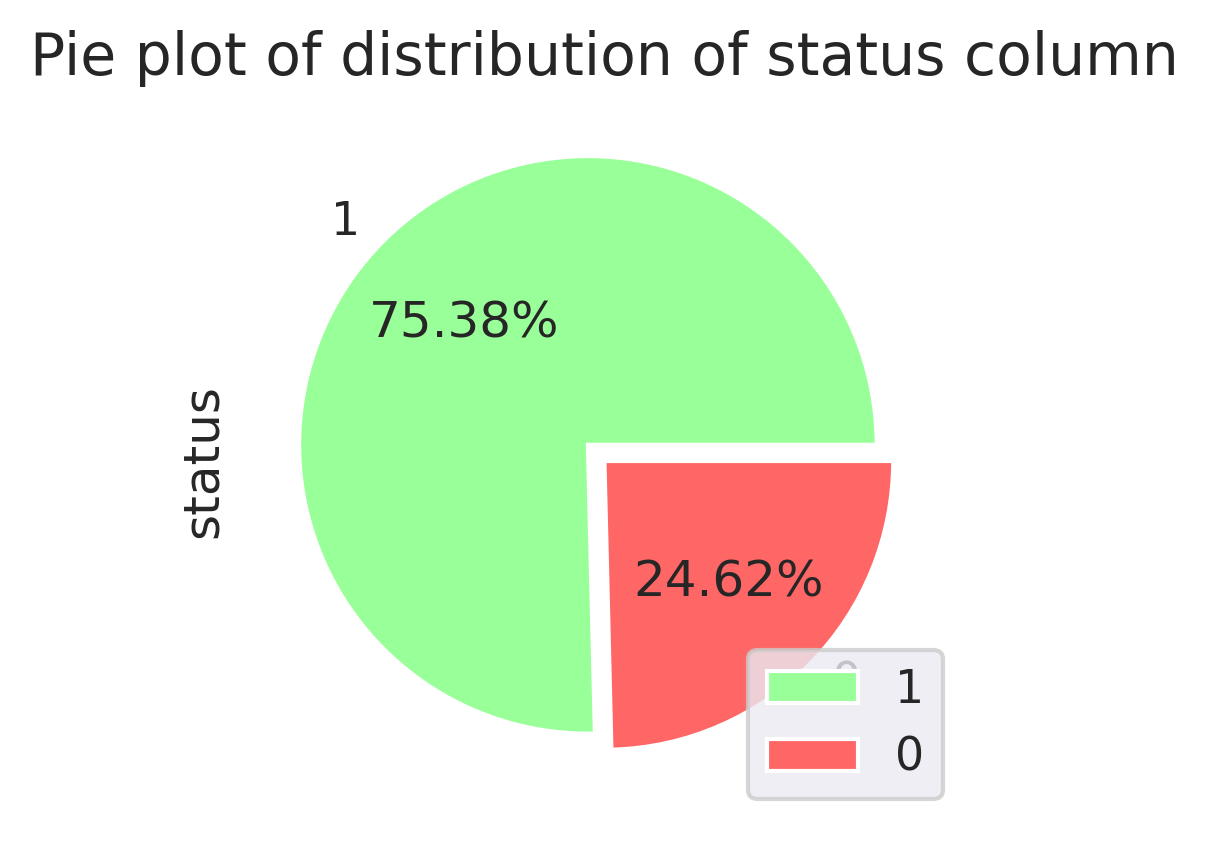

In [ ]:
explode=(0.08,0)
df['status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie plot of distribution of status column", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
df.groupby("status").mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr("spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(df.drop(["name", "status"], axis=1), 0.85)
corr_features

{'HNR',
 'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

In [ ]:
df_anova = df.drop(["name"], axis=1)
grps = pd.unique(df_anova.status.values)

coldrop = []

for i in range(len(df_anova.columns)-1):

    d_data = {grp:df_anova[df_anova.columns[i]][df_anova.status == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and status".format(df_anova.columns[i]), p)

    if p < 0.05:
        print("There is relation between {} and status \n".format(df_anova.columns[i]))
    else:
        print("There is no relation between {} and status \n".format(df_anova.columns[i]))
        coldrop.append(df_anova.columns[i])

P_Value of MDVP:Fo(Hz) and status 3.121919402836332e-08
There is relation between MDVP:Fo(Hz) and status 

P_Value of MDVP:Fhi(Hz) and status 0.020275669142798408
There is relation between MDVP:Fhi(Hz) and status 

P_Value of MDVP:Flo(Hz) and status 4.1970041821535477e-08
There is relation between MDVP:Flo(Hz) and status 

P_Value of MDVP:Jitter(%) and status 8.209989250843925e-05
There is relation between MDVP:Jitter(%) and status 

P_Value of MDVP:Jitter(Abs) and status 1.282252324068255e-06
There is relation between MDVP:Jitter(Abs) and status 

P_Value of MDVP:RAP and status 0.0001643393410195311
There is relation between MDVP:RAP and status 

P_Value of MDVP:PPQ and status 4.257766523261872e-05
There is relation between MDVP:PPQ and status 

P_Value of Jitter:DDP and status 0.00016454664474031298
There is relation between Jitter:DDP and status 

P_Value of MDVP:Shimmer and status 1.2647022896752661e-07
There is relation between MDVP:Shimmer and status 

P_Value of MDVP:Shimmer(dB)

In [ ]:
df.drop("name", axis=1).columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df.drop("name", axis=1))

var_thres.get_support()

print(df.drop("name", axis=1).columns[var_thres.get_support()])


constant_columns = [column for column in df.drop("name", axis=1).columns
                    if column not in df.drop("name", axis=1).columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
[]
0


In [ ]:
corr_features = list(corr_features)

list_drop = corr_features + coldrop
list_drop.append("name")
list_drop

['Shimmer:APQ5',
 'MDVP:Shimmer(dB)',
 'PPE',
 'MDVP:Jitter(Abs)',
 'Jitter:DDP',
 'MDVP:APQ',
 'Shimmer:APQ3',
 'Shimmer:DDA',
 'MDVP:PPQ',
 'MDVP:RAP',
 'HNR',
 'name']

In [ ]:
df.drop(list_drop, axis=1, inplace=True)
display(df.columns)
display(df.shape)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Shimmer', 'NHR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2',
       'D2'],
      dtype='object')

(195, 12)

In [ ]:
X = df.drop(["status"], axis=1)
y = df["status"]

##Applying Standardization

In [ ]:
#Data Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
feature = scaler.fit_transform(X)
feature

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.80132308,
         0.48047686, -0.21053082],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.47985265,
         1.31118546,  0.27507712],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.14144541,
         1.01768236, -0.10362861],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -1.01415428,
        -0.81807931,  0.78033848],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.97496019,
        -0.22906571, -0.63700298],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.03647134,
        -0.43085284,  0.45480231]])

In [ ]:
#Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.3, random_state=42)
X_train

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (136, 11)
Shape of y_train: (136,)
Shape of X_test: (59, 11)
Shape of y_test: (59,)


In [ ]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy=1)

X_train, y_train = os.fit_resample(X_train, y_train)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(X_train))

##Applying Logistic Regression

In [ ]:
#Logistic Regression
def lr_grid_search(X, y):
    model = LogisticRegression()

    # Create a dictionary of all values we want to test
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]

    # define grid search
    param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X, y)

    return grid_result.best_params_
lr_grid_search(X_train, y_train)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
lr = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

print(metrics.classification_report(y_test, y_pred_lr))

lr_score = lr.score(X_train,y_train)
print(lr_score)

lr_score = lr.score(X_test,y_test)
print(lr_score)

              precision    recall  f1-score   support

           0       0.50      0.87      0.63        15
           1       0.94      0.70      0.81        44

    accuracy                           0.75        59
   macro avg       0.72      0.79      0.72        59
weighted avg       0.83      0.75      0.76        59

0.8155339805825242
0.7457627118644068


In [ ]:
lr_tacc = lr.score(X_test,y_test)
lr_train_acc = lr.score(X_train, y_train)

<Axes: >

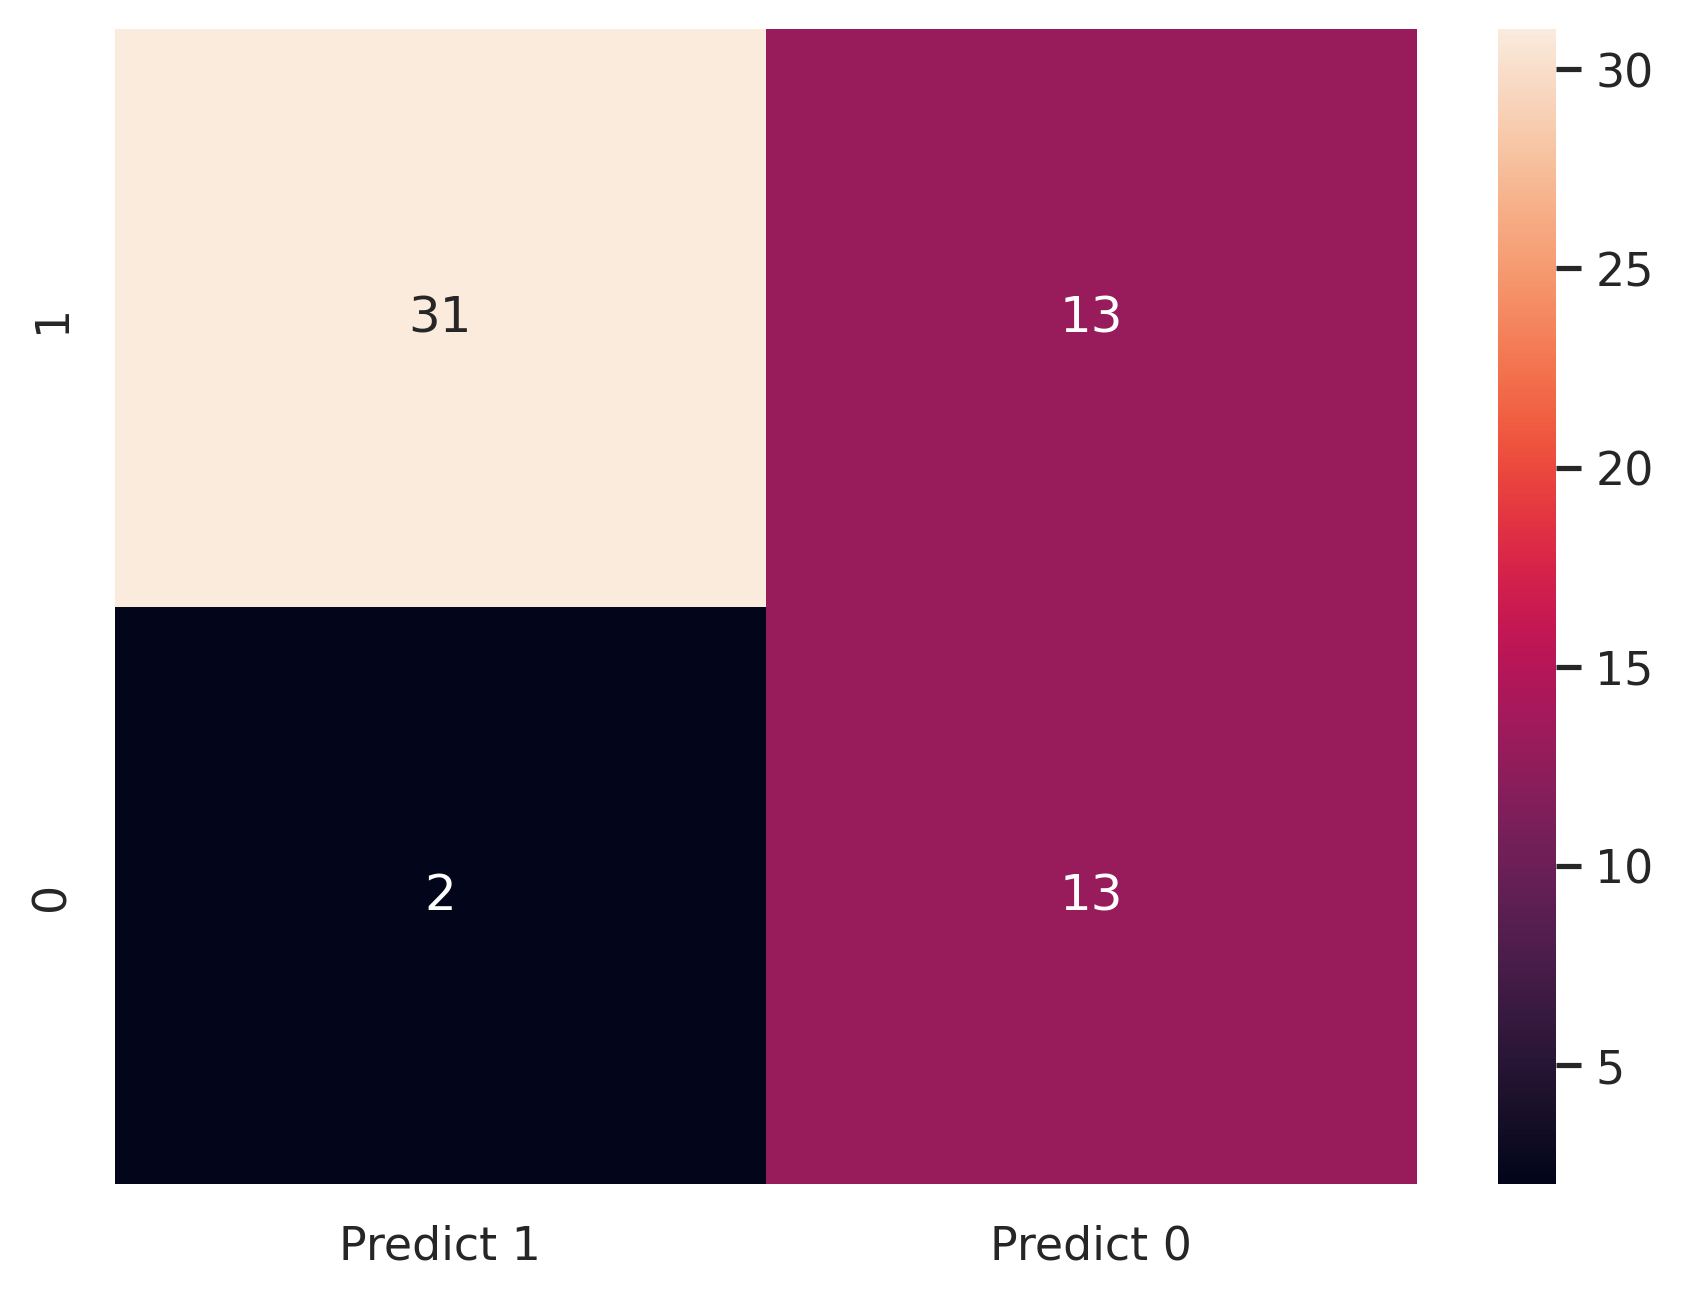

In [ ]:
#Confusion matrix of Logistic regression model
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

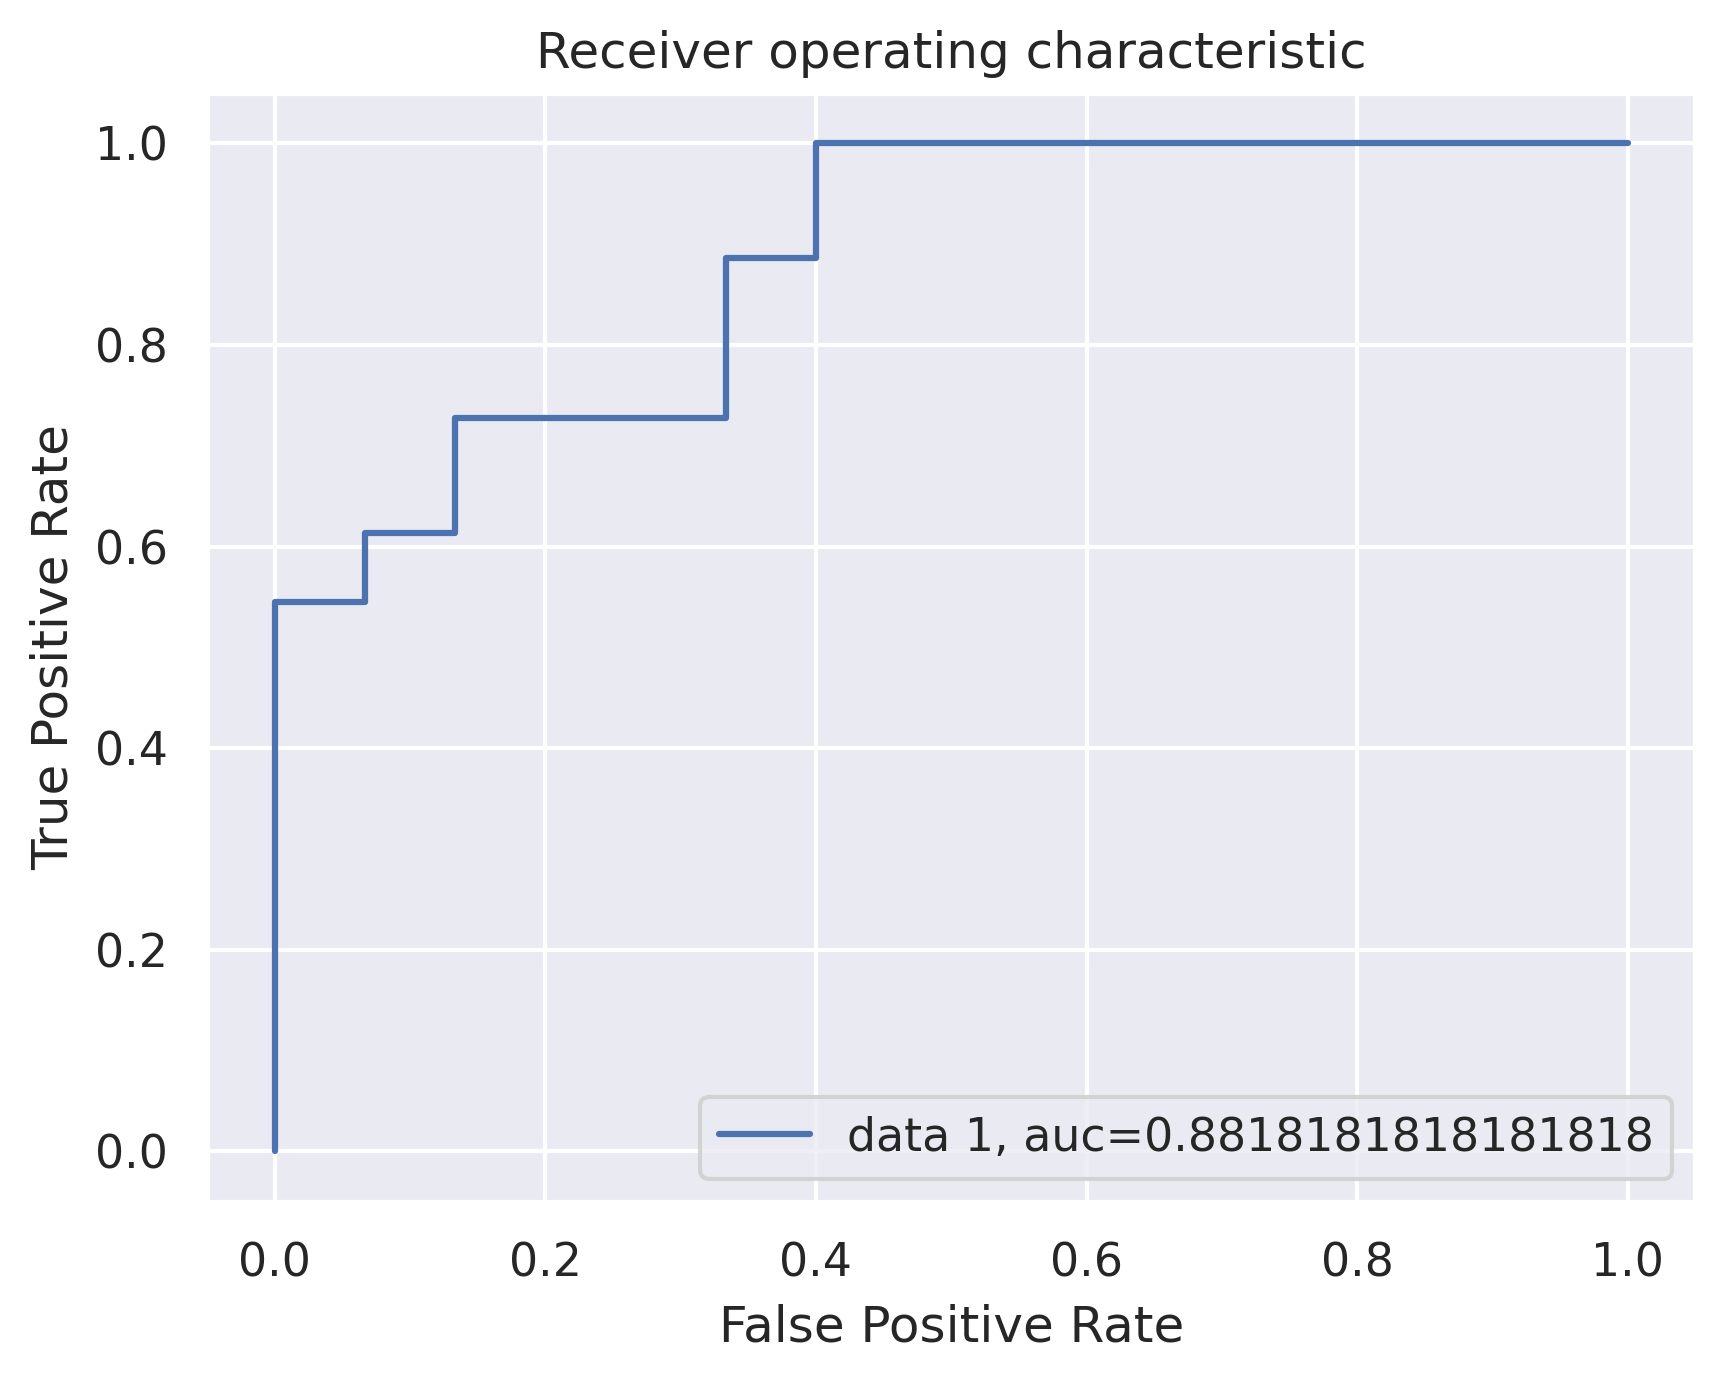

In [ ]:
#AUC of Logistic regression model
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
lr_auc = auc
lr_auc

0.9924242424242424

##Applying Decision Tree

In [ ]:
#Decision Tree Classifier
def dtree_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # decision tree model
    dtree = DecisionTreeClassifier()

    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    dtree_gscv.fit(X, y)

    return dtree_gscv.best_params_
dtree_grid_search(X_train, y_train)

{'criterion': 'entropy', 'max_depth': 7}

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
dTree.fit(X_train, y_train)

print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

y_pred_dtree = dTree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dtree))

0.7912621359223301
0.864406779661017
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.89      0.93      0.91        44

    accuracy                           0.86        59
   macro avg       0.83      0.80      0.81        59
weighted avg       0.86      0.86      0.86        59



In [ ]:
dt_tacc = dTree.score(X_test,y_test)
dt_train_acc = dTree.score(X_train, y_train)

<Axes: >

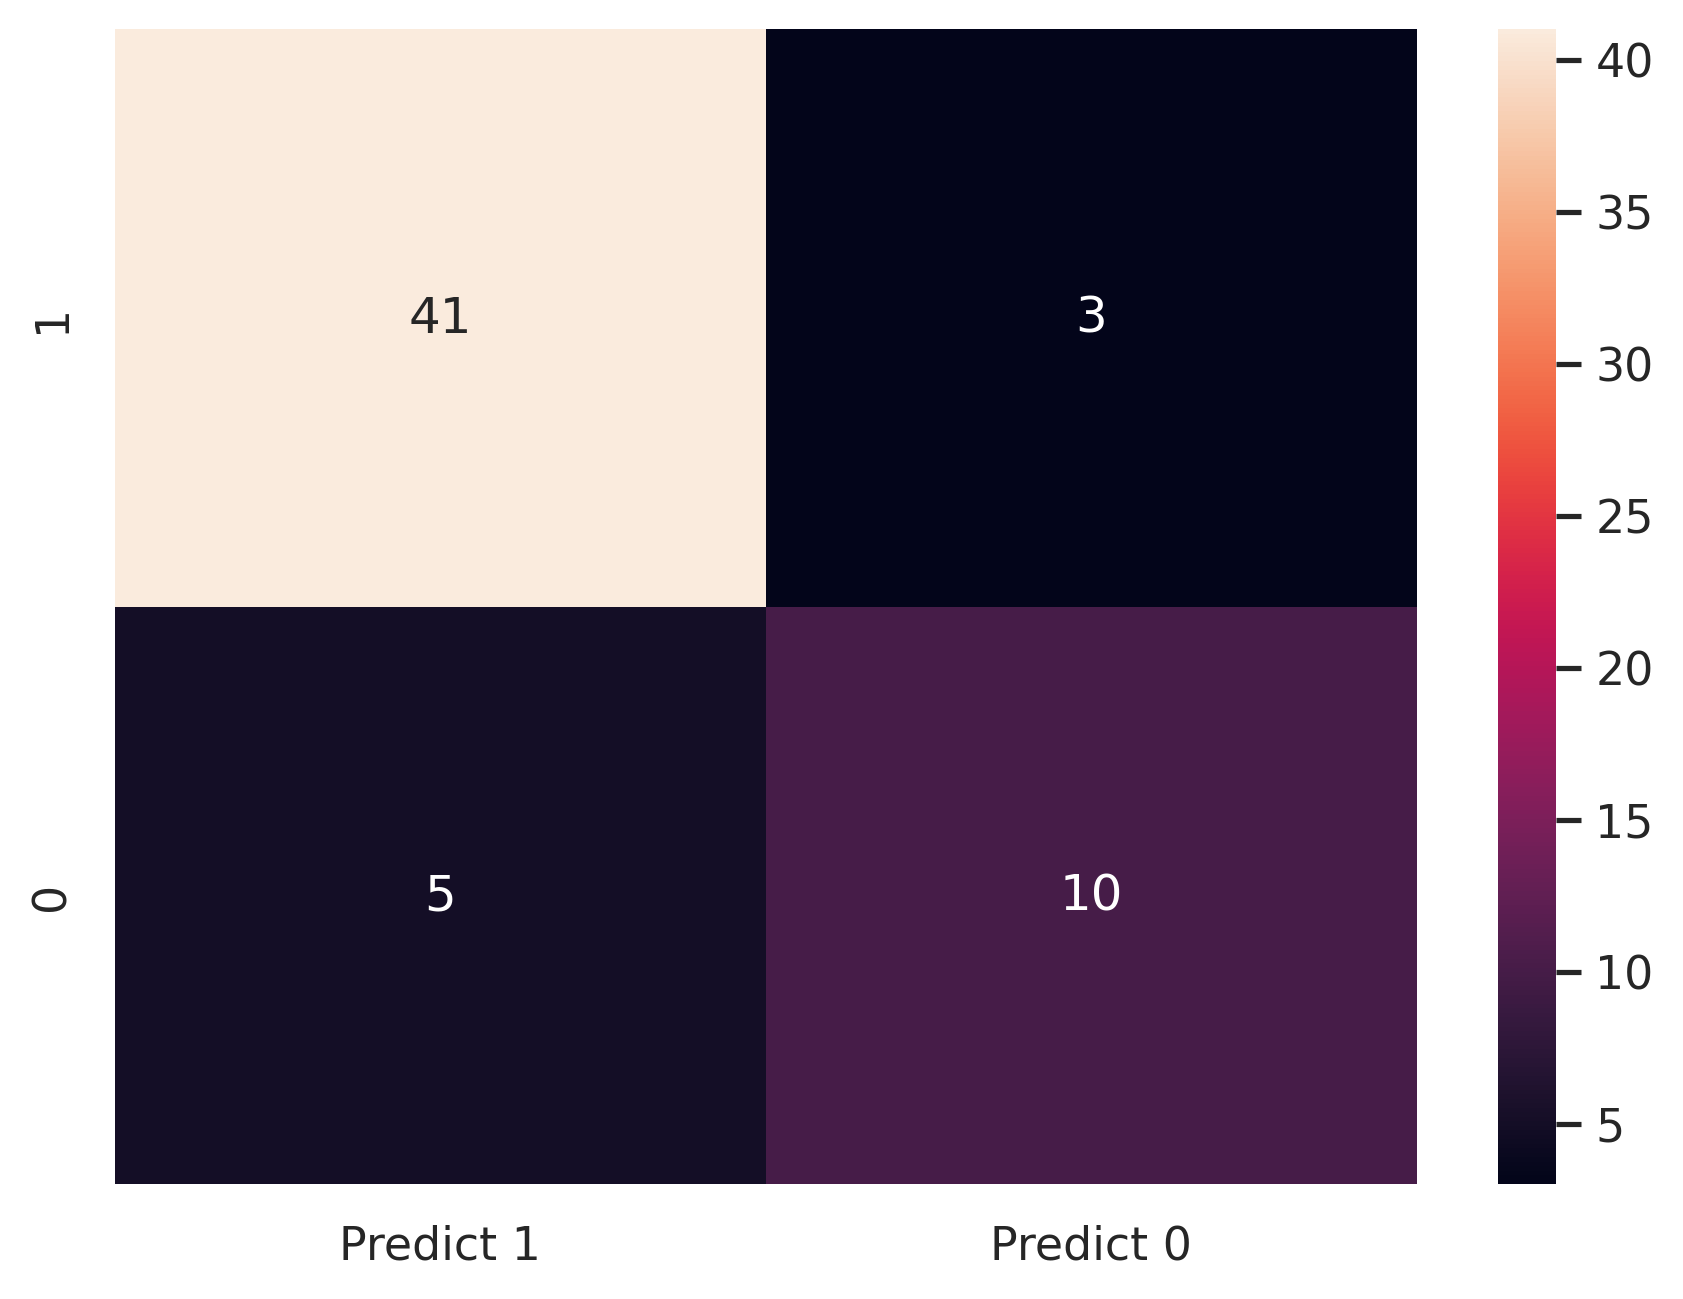

In [ ]:
#Confusion matrix of DecisionTree model
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

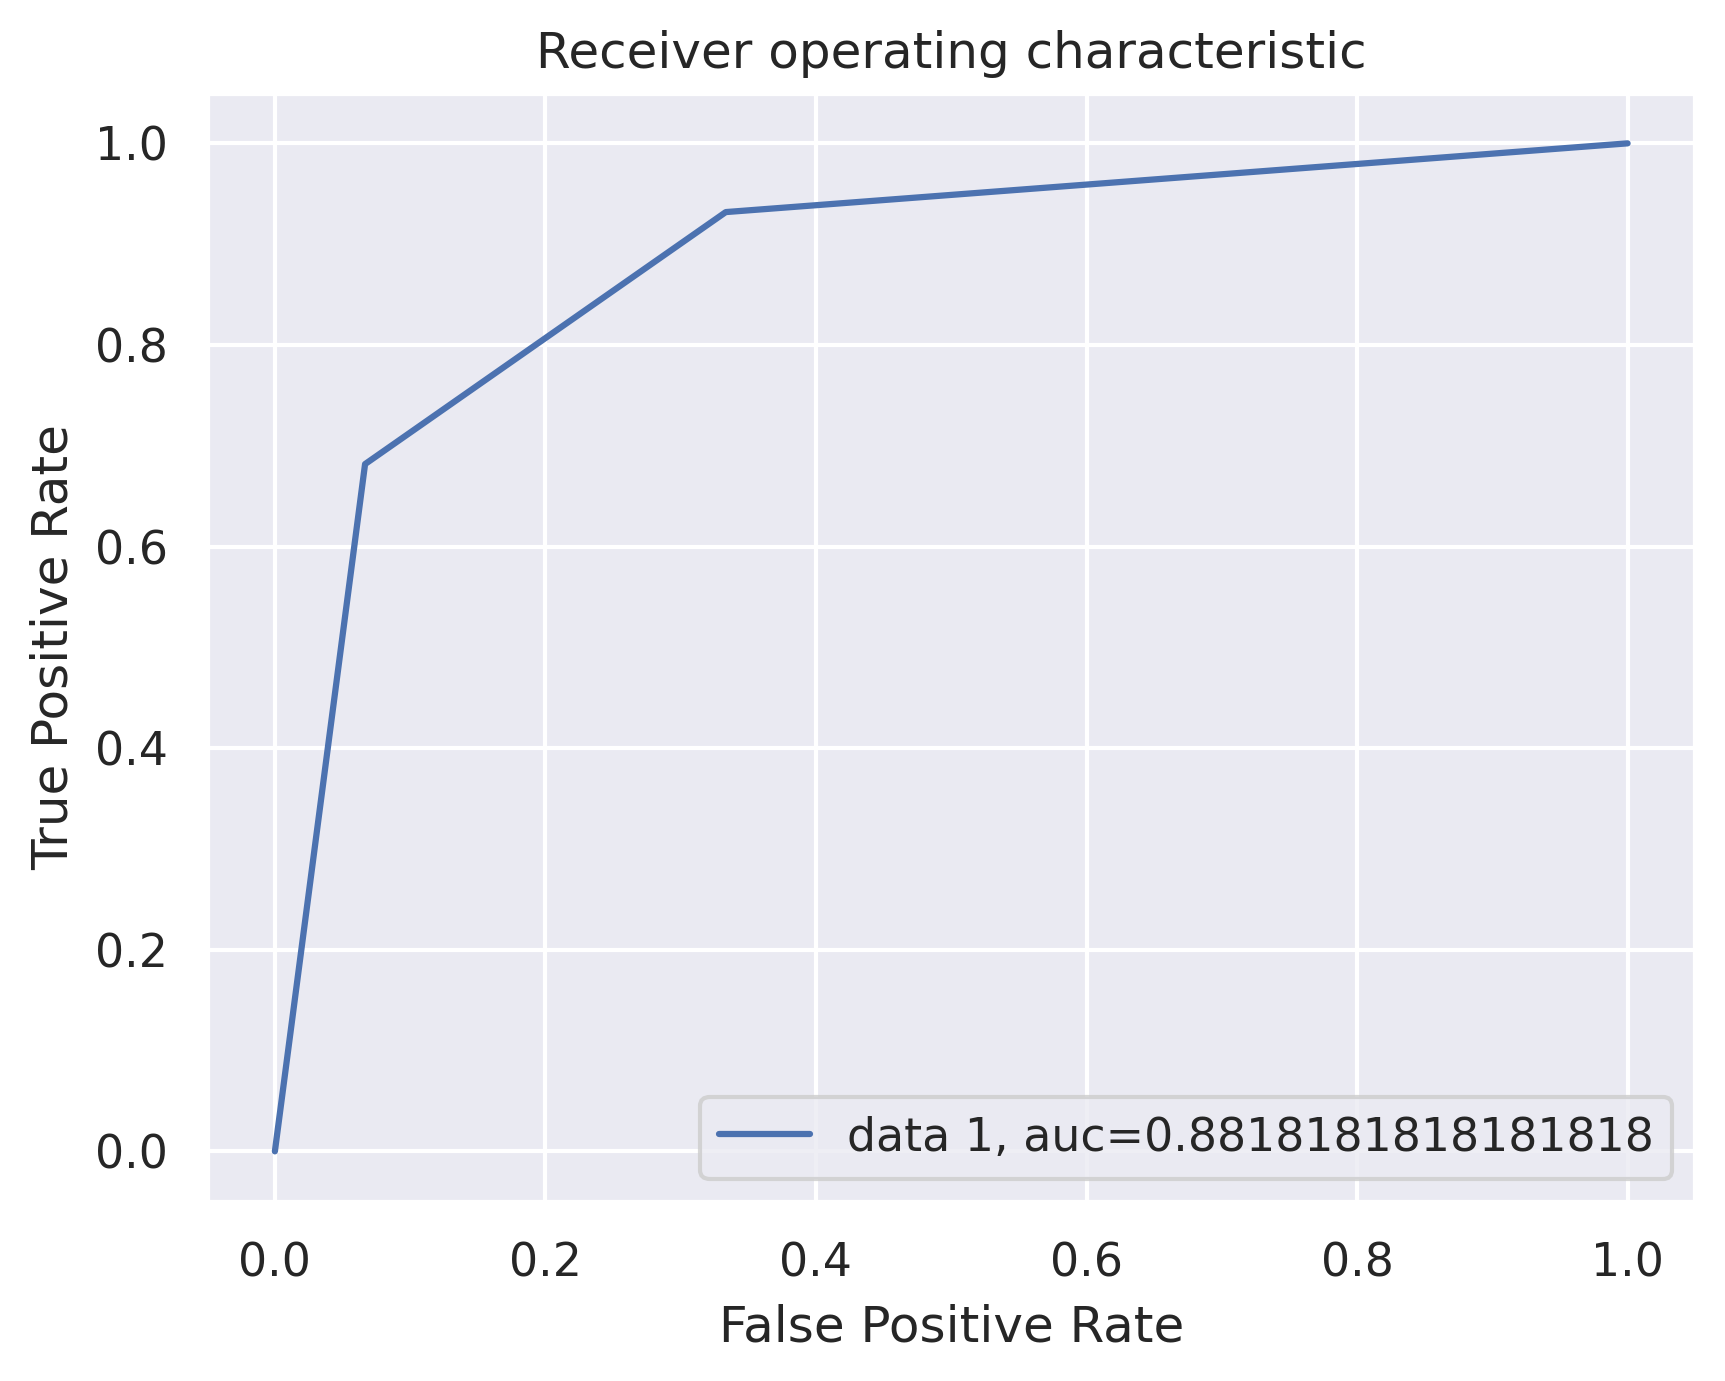

In [ ]:
#AUC of DecisionTree model
y_pred_proba = dTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
dt_auc = auc
dt_auc

0.9924242424242424

##Applying Random Forest

In [ ]:
#Random forest classifier
def rf_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {
    'n_estimators': [5,10,20,40,50,60,70,80,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Random Forest model
    rf = RandomForestClassifier()

    #use gridsearch to test all values
    rf_gscv = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    rf_gscv.fit(X, y)

    return rf_gscv.best_params_
rf_grid_search(X_train, y_train)

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 40}

In [ ]:
rfcl = RandomForestClassifier(n_estimators=10, max_features='auto', max_depth=6, criterion='gini')
rfcl = rfcl.fit(X_train, y_train)

y_pred_rf = rfcl.predict(X_test)

print(rfcl.score(X_train,y_train))
print(rfcl.score(X_test,y_test))

print(metrics.classification_report(y_test, y_pred_rf))

1.0
0.9152542372881356
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.93      0.95      0.94        44

    accuracy                           0.92        59
   macro avg       0.90      0.88      0.89        59
weighted avg       0.91      0.92      0.91        59



In [ ]:
rf_tacc = rfcl.score(X_test,y_test)
rf_train_acc = rfcl.score(X_train, y_train)

<Axes: >

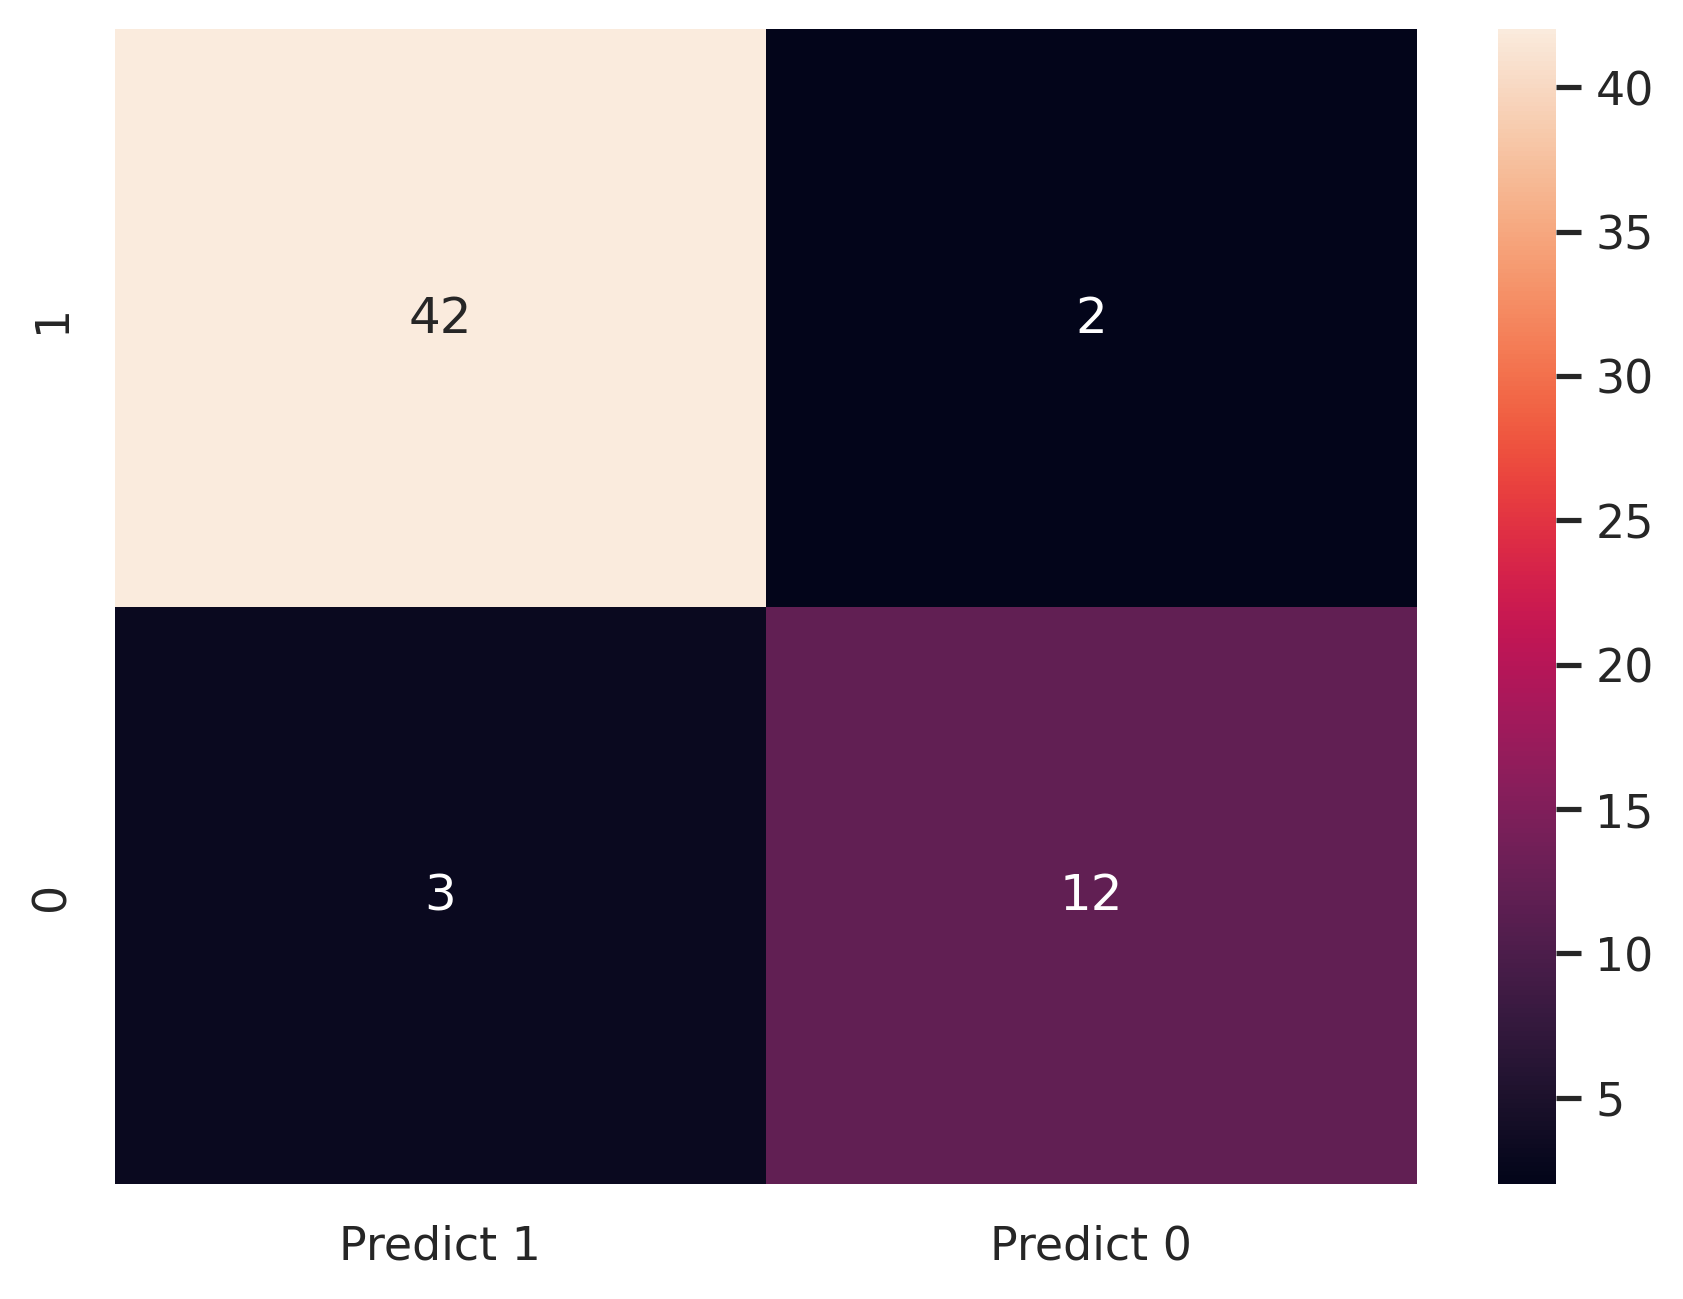

In [ ]:
#Confusion matrix of Random Forest Classifier Model
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

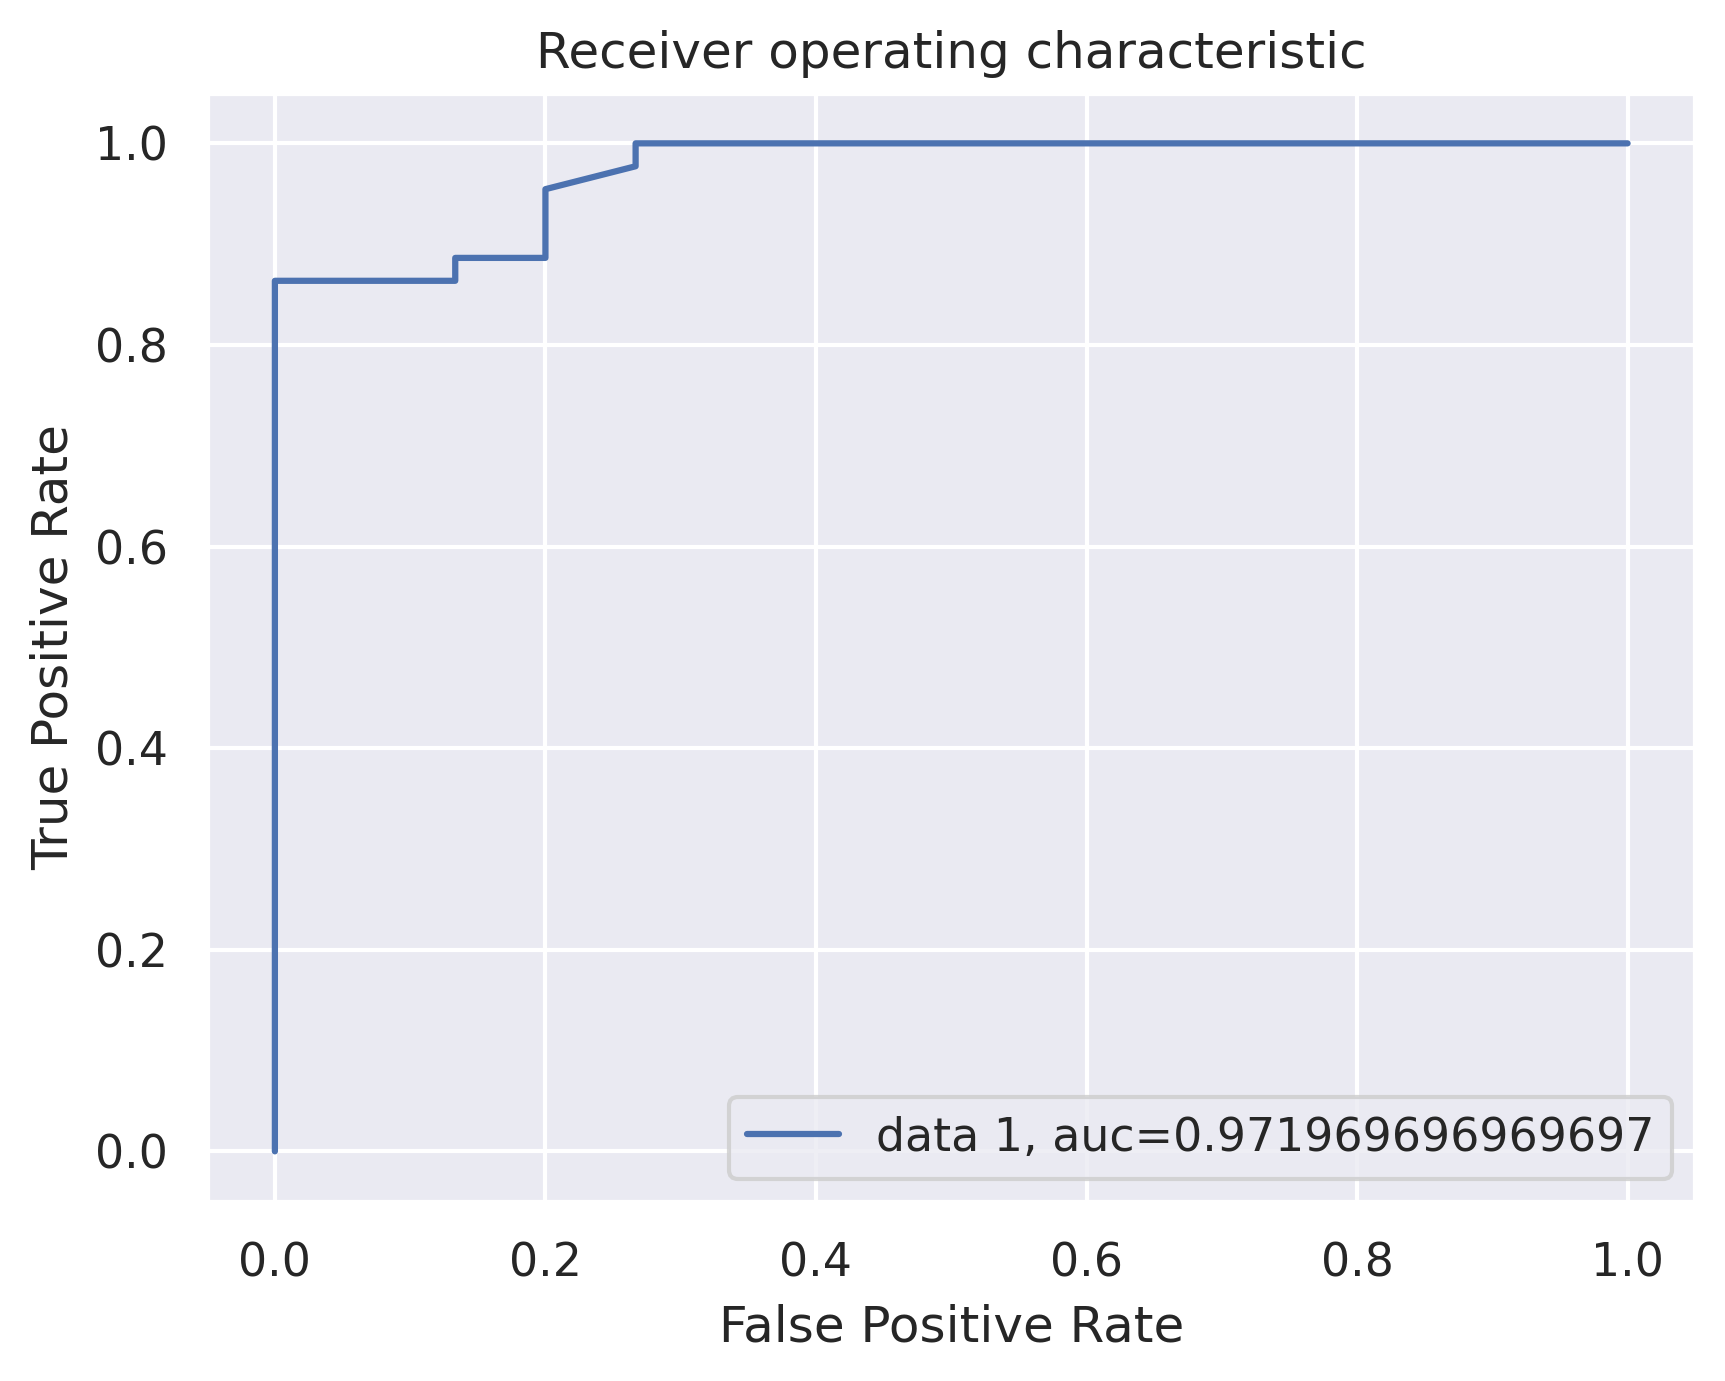

In [ ]:
#AUC of Random Forest Classifier Model
y_pred_proba = rfcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
rf_auc = auc
rf_auc

0.9924242424242424

##Applying KNN Model

In [ ]:
#kNN
def knn_grid_search(X, y):
    #create a dictionary of all values we want to test
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    knn = KNeighborsClassifier()

    #use gridsearch to test all values
    knn_gscv = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    #fit model to data
    knn_gscv.fit(X, y)

    return knn_gscv.best_params_
knn_grid_search(X_train, y_train)

{'n_neighbors': 1}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_knn))

1.0
0.9830508474576272
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.98      1.00      0.99        44

    accuracy                           0.98        59
   macro avg       0.99      0.97      0.98        59
weighted avg       0.98      0.98      0.98        59



In [ ]:
knn_tacc = knn.score(X_test, y_test)
knn_train_acc = knn.score(X_train, y_train)

<Axes: >

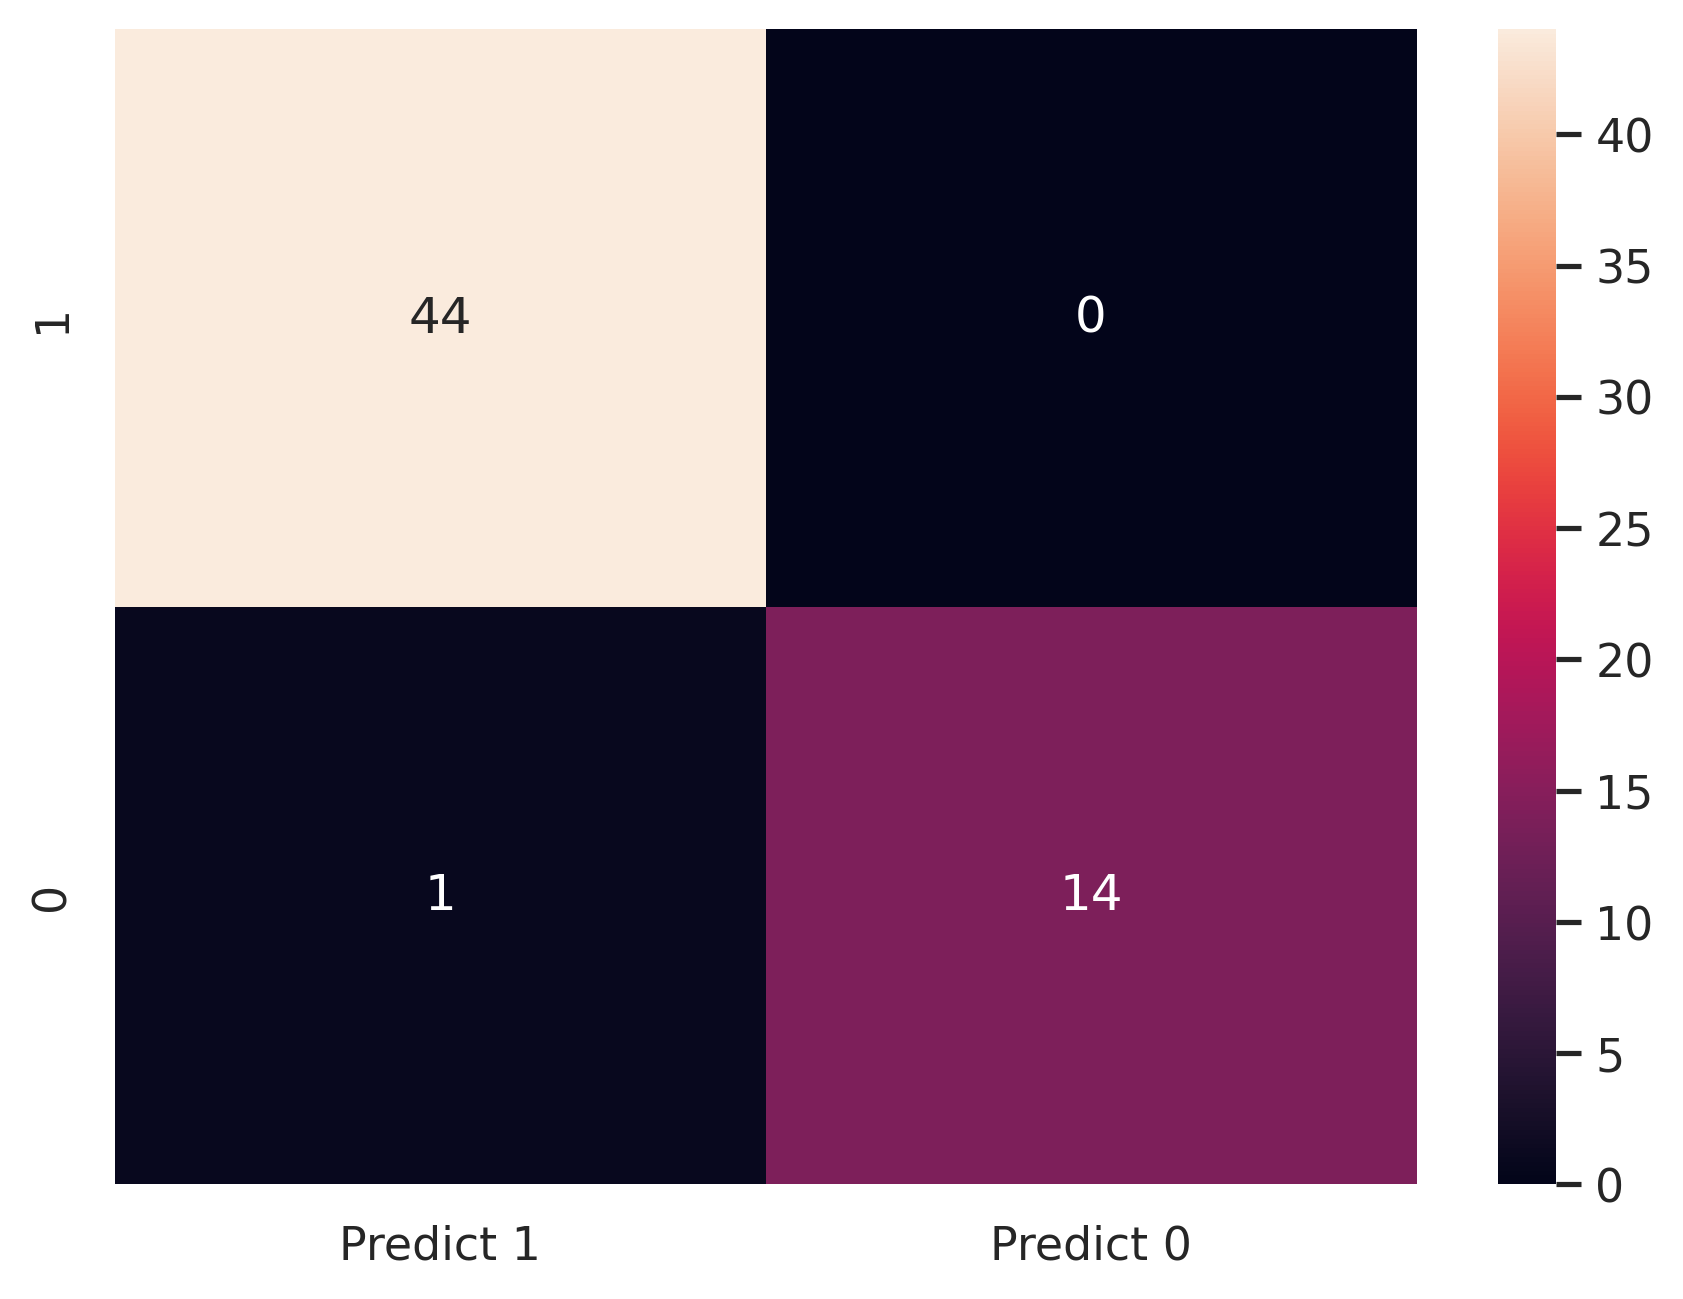

In [ ]:
#Confusion matrix of kNN
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

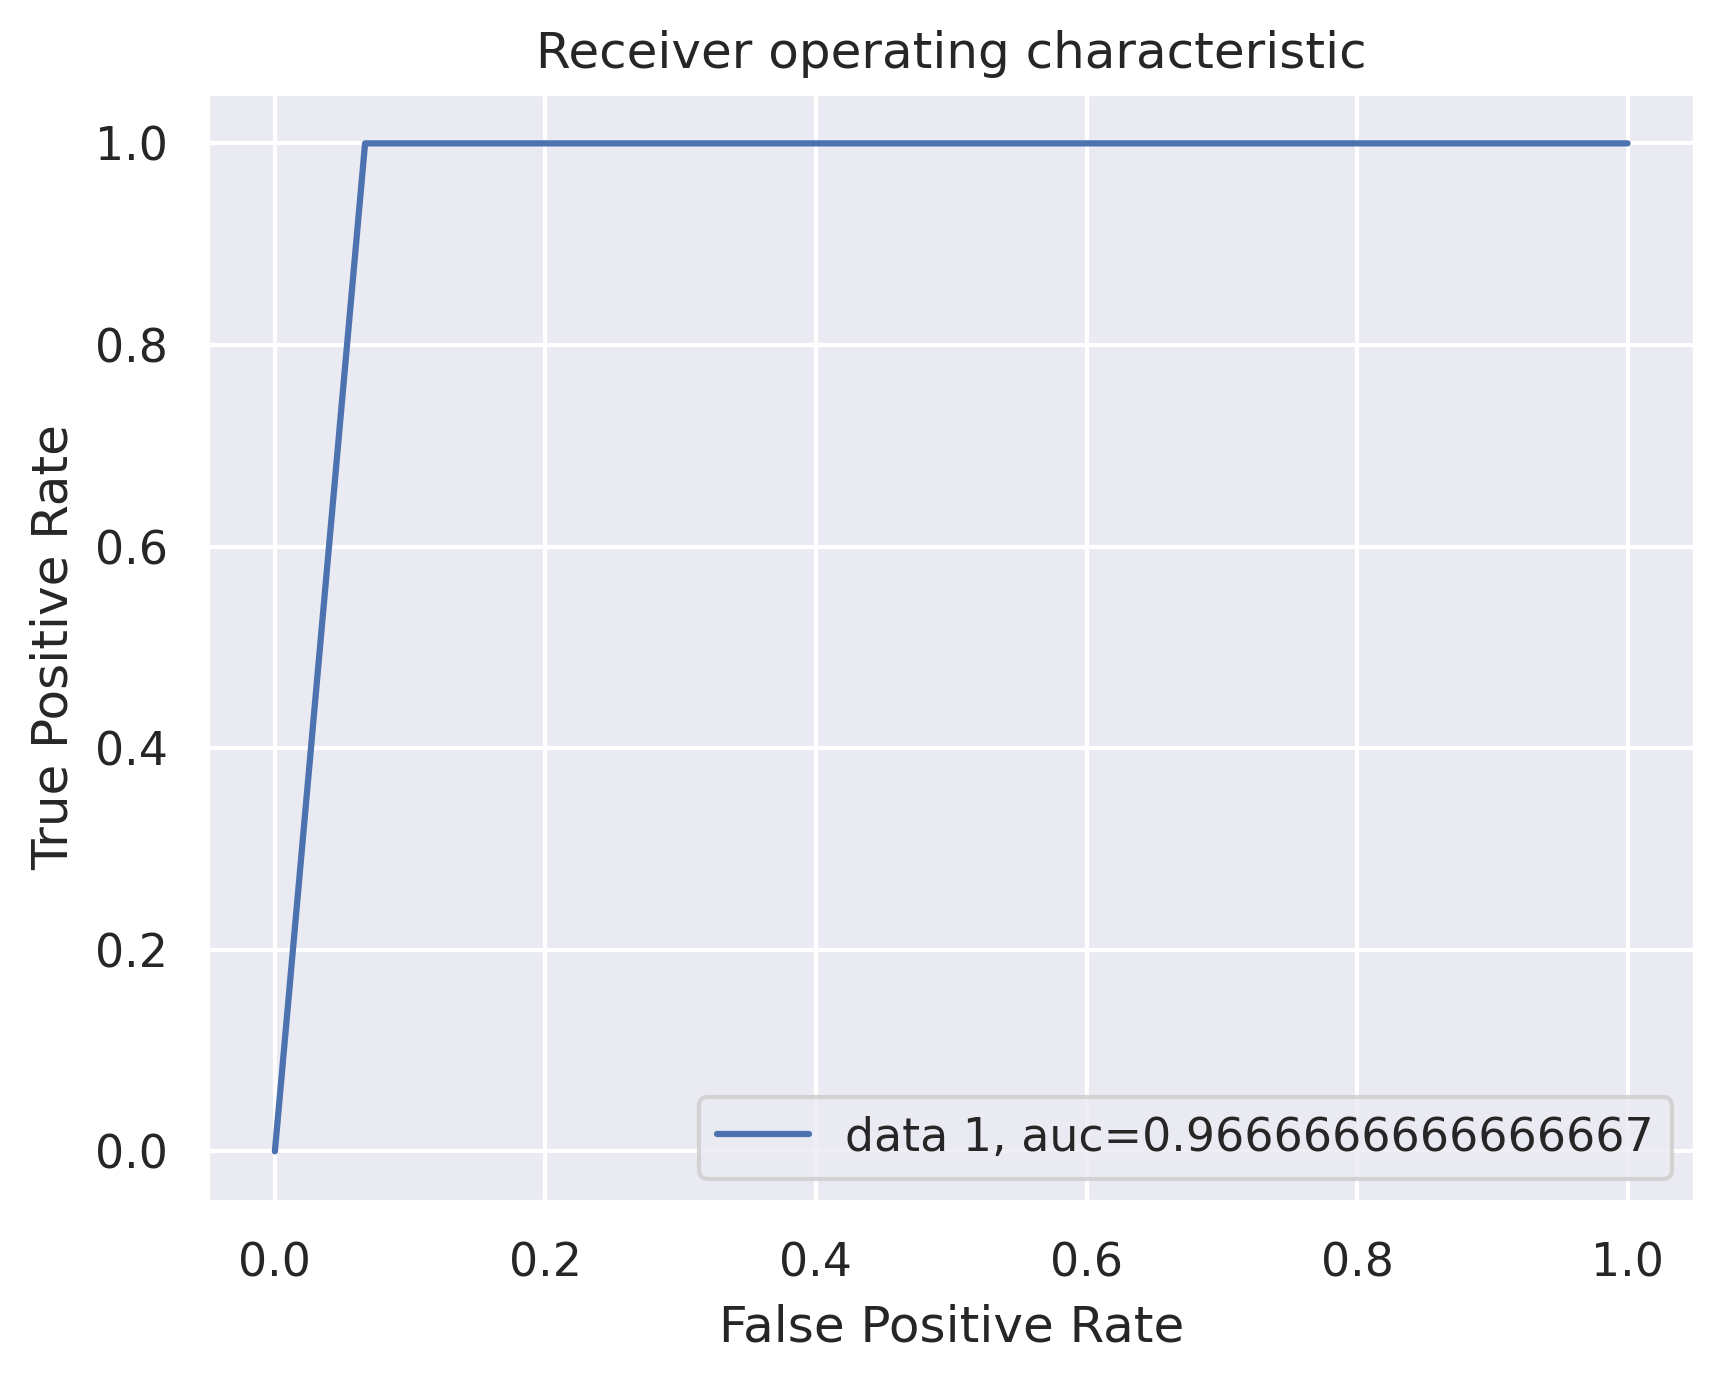

In [ ]:
#AUC of kNN
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
knn_auc=auc

##Applying SVM Model

In [ ]:
#SVM
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    svm = SVC()

    #use gridsearch to test all values
    svm_gscv = RandomizedSearchCV(estimator = svm,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    svm_gscv.fit(X, y)

    return svm_gscv.best_params_
    svm_grid_search(X_train, y_train)

In [ ]:
from sklearn import svm
svm = SVC(gamma=0.4, C=100, kernel='rbf', probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

In [ ]:
svm_tacc = svm.score(X_test, y_test)
svm_train_acc = svm.score(X_train, y_train)

<Axes: >

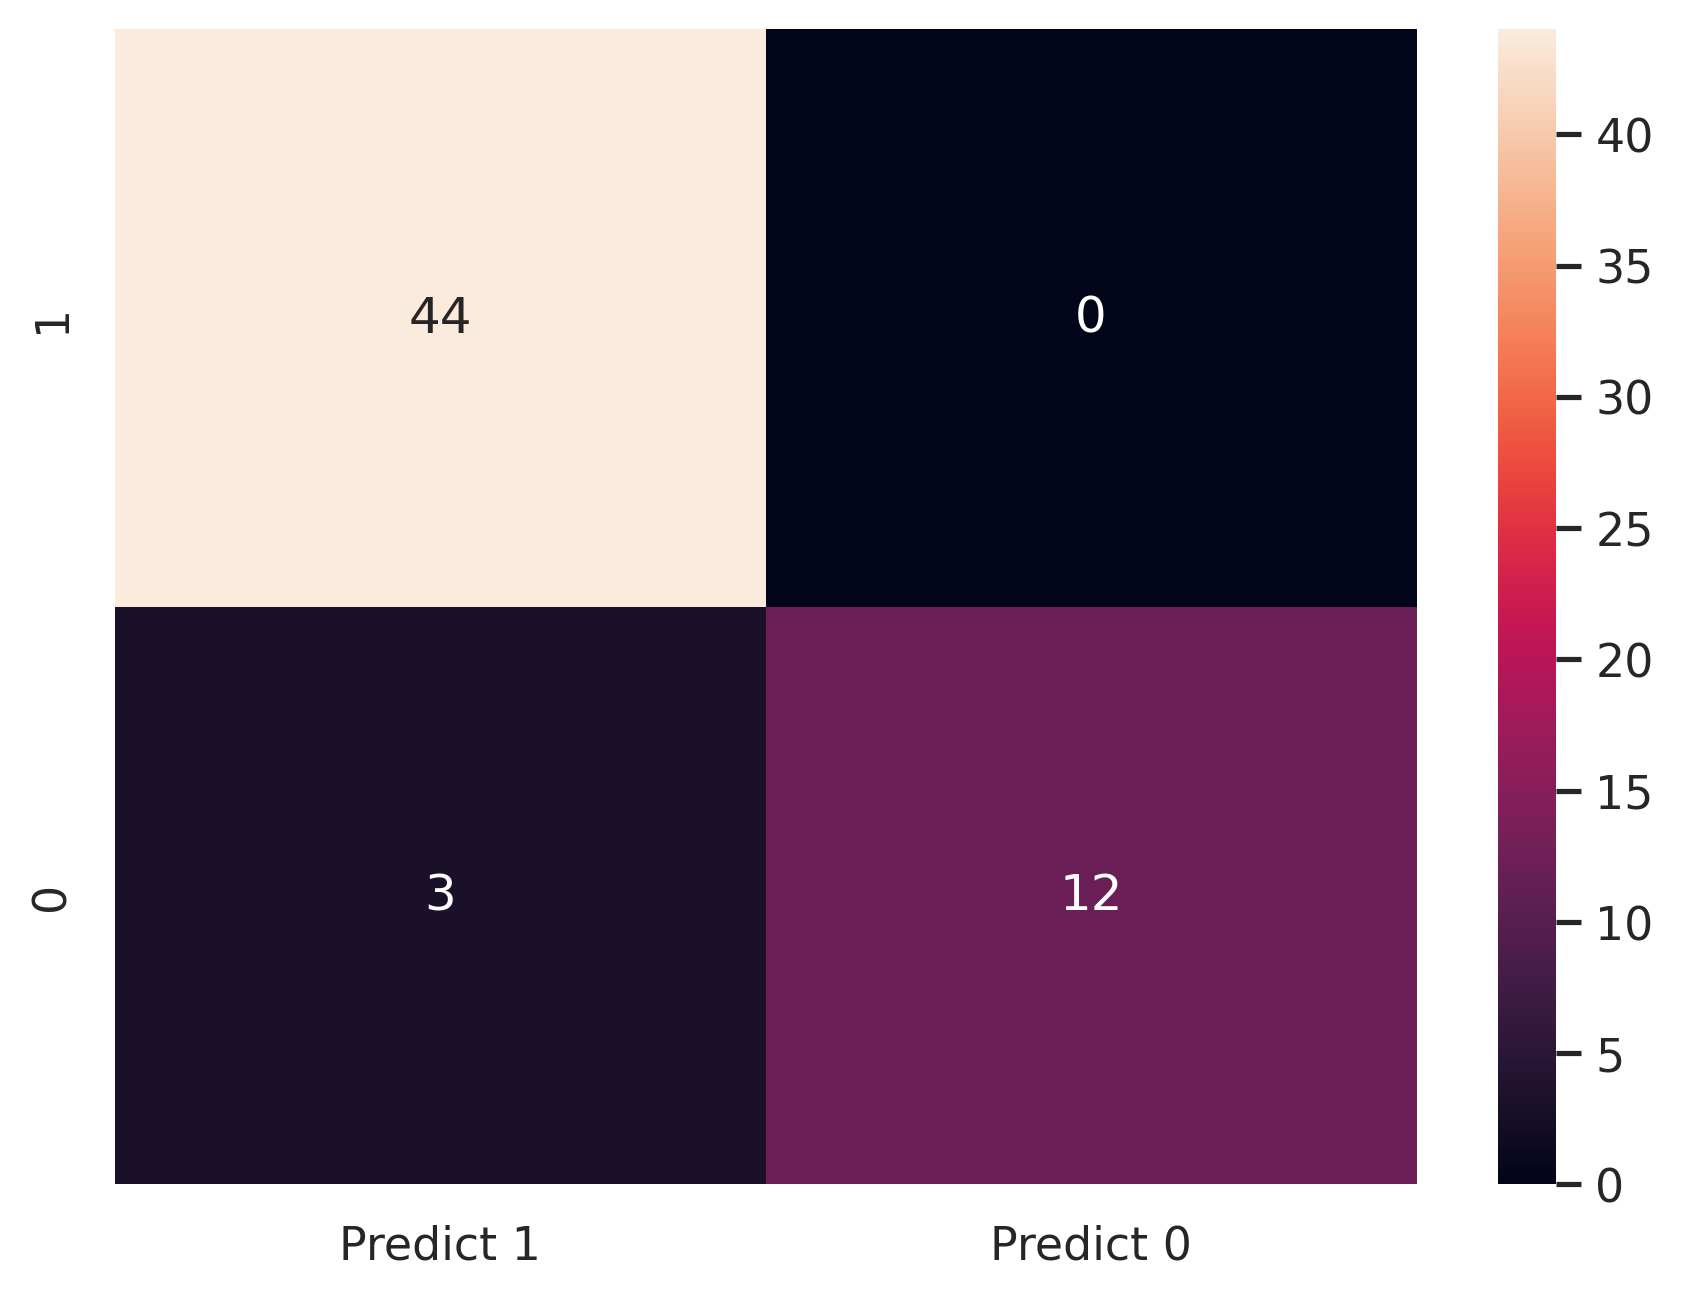

In [ ]:

#Confusion Matrix of SVM
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

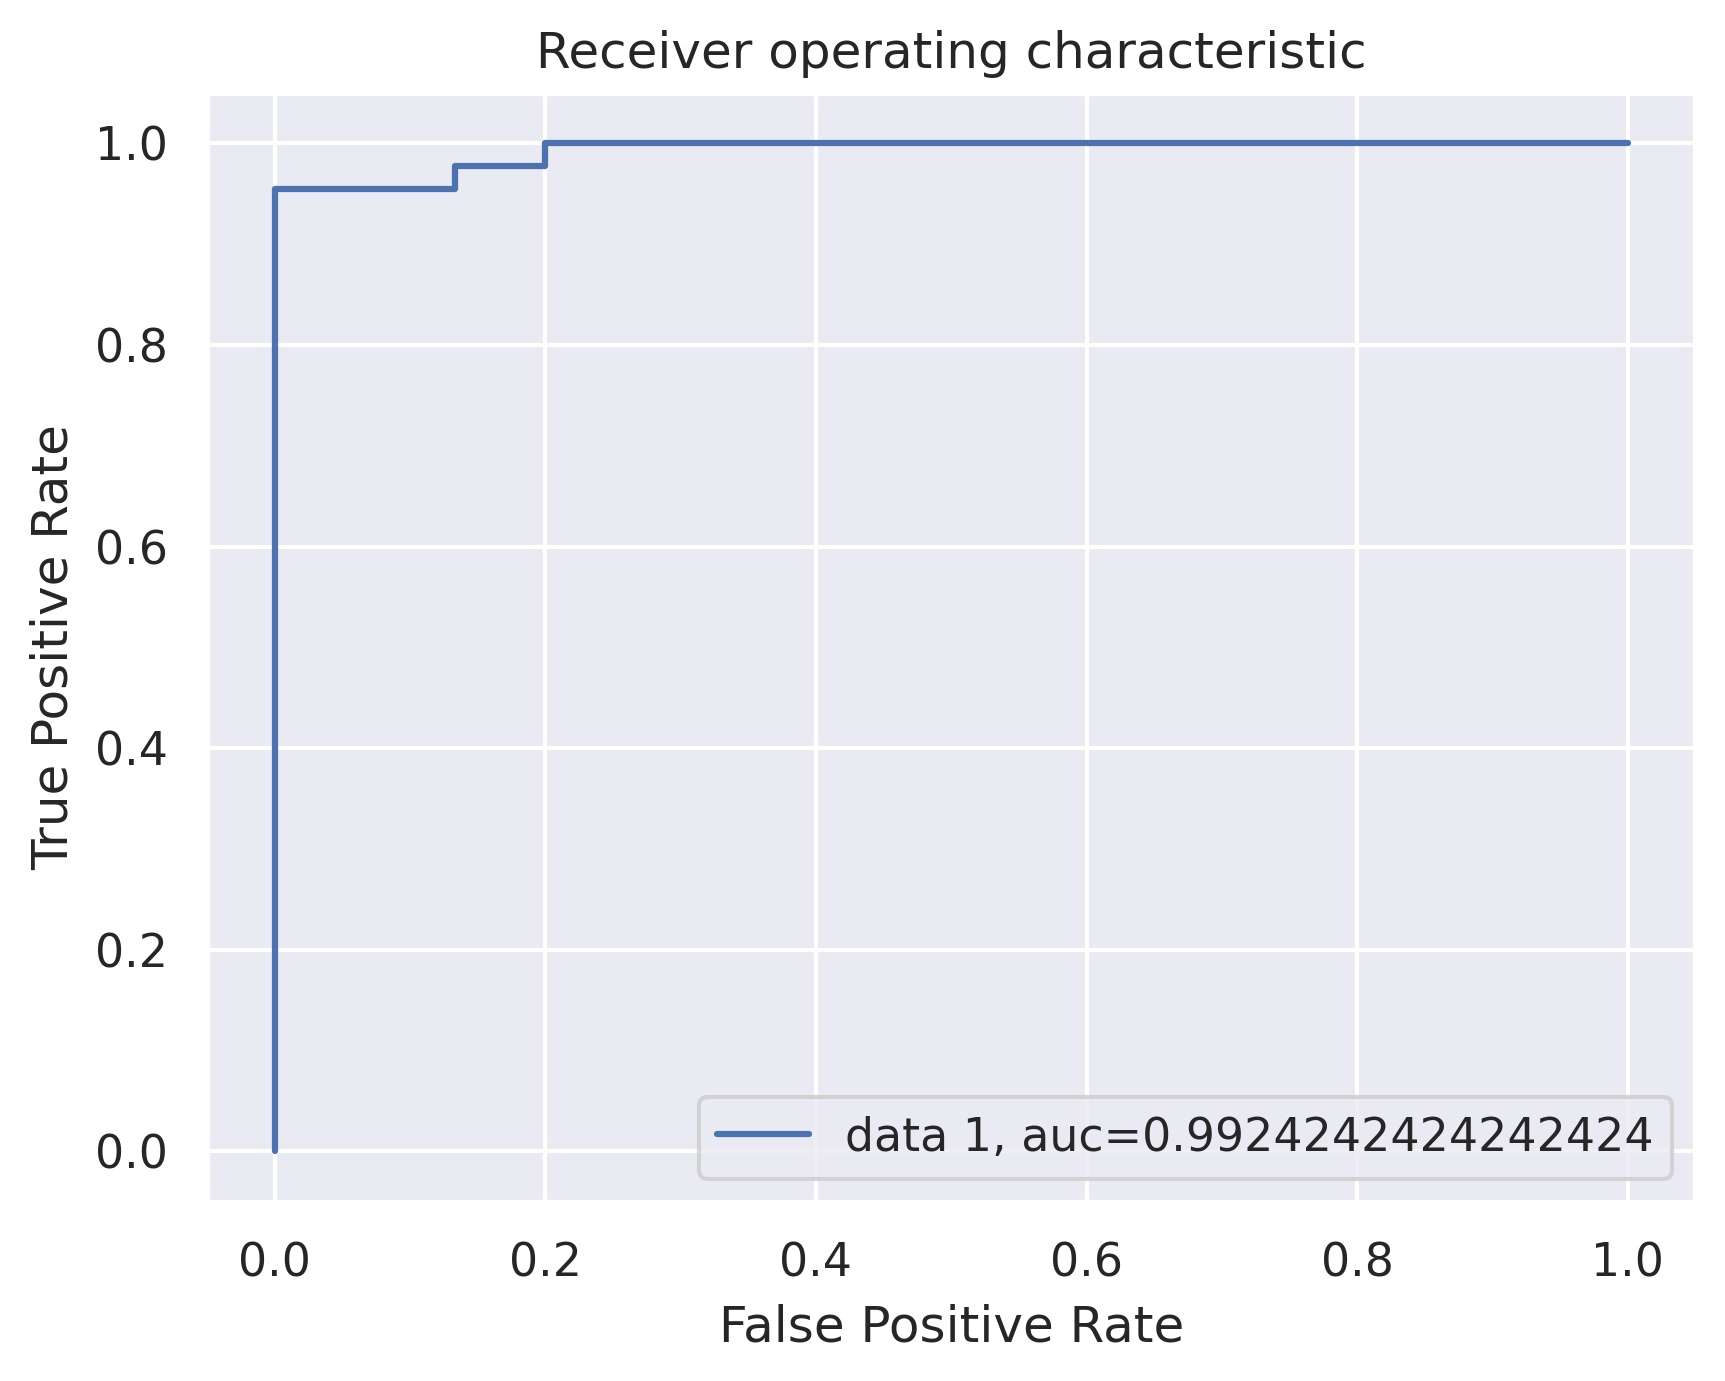

In [ ]:
#AUC of SVM
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
svm_auc = auc
svm_auc

In [ ]:
def comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list):
    data = {"Model Name": model_list, "Train Accuracy(%)": [i*100 for i in model_train_acc_list], "Test Accuracy(%)": [i*100 for i in model_test_acc_list], "AUC Score": model_auc_list}
    Comparision = pd.DataFrame(data)
    return Comparision


model_list = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "kNN", "SVM"]
model_train_acc_list = [lr_train_acc, dt_train_acc,  rf_train_acc, knn_train_acc, svm_train_acc]
model_test_acc_list = [lr_tacc, dt_tacc, rf_tacc, knn_tacc, svm_tacc]
model_auc_list = [lr_auc, dt_auc, rf_auc, knn_auc, svm_auc ]
comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list)

,Model Name,Train Accuracy(%),Test Accuracy(%),AUC Score
0,Logistic Regression,81.553398,74.576271,0.992424
1,Decision Tree Classifier,79.126214,86.440678,0.992424
2,Random Forest Classifier,100.000000,91.525424,0.992424
3,kNN,100.000000,98.305085,0.992424
4,SVM,100.000000,94.915254,0.992424


In [ ]:
#Cross Validation
#Stratified K-fold Cross Validation
#kNN
skfold = StratifiedKFold(n_splits=5)
model = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(model, feature, y, cv=skfold)

print(scores)
print(np.mean(scores))

[0.74358974 0.79487179 0.8974359  0.71794872 0.74358974]
0.7794871794871795


In [ ]:
#SVM
skfold = StratifiedKFold(n_splits=5)
model = SVC(gamma=0.4, C=100, kernel='rbf', probability=True)
scores = cross_val_score(model, feature, y, cv=skfold)

print(scores)
print(np.mean(scores))

[0.82051282 0.79487179 0.87179487 0.76923077 0.74358974]
0.8


In [ ]:
df[df["status"]==0].head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,phon_R01_S07_1,197.076,206.896,192.055,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.097,0.00563,0.00680,0.00802,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,phon_R01_S07_2,199.228,209.512,192.091,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,0.089,0.00504,0.00641,0.00762,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


In [ ]:
df[df["status"]==1].head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [ ]:
#Prediction System - kNN
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Parkinson's Disease Detected" if knn.predict(in_data_sca) else "No Parkinson's Disease Detected")

119.992, 157.302, 74.997, 0.00784, 0.04374, 0.02211, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442
Parkinson's Disease Detected


In [ ]:
#Prediction System - SVM
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Parkinson's Disease Detected" if svm.predict(in_data_sca) else "No Parkinson's Disease Detected")

119.992, 157.302, 74.997, 0.00784, 0.04374, 0.02211, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442
Parkinson's Disease Detected
